# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

Component	Fraction of total variace	Accumulative fraction of total variance
1		0.164043			0.164043
2		0.133235			0.297278
3		0.101735			0.399013
4		0.070634			0.469646
5		0.038666			0.508313
6		0.036808			0.545121
7		0.031282			0.576403
8		0.027337			0.603741
9		0.026165			0.629905
10		0.022309			0.652215
11		0.020482			0.672697
12		0.018683			0.691380
13		0.017344			0.708724
14		0.016844			0.725568
15		0.015188			0.740756
16		0.015086			0.755842
17		0.014291			0.770133
18		0.014120			0.784254
19		0.013250			0.797504
20		0.011464			0.808968
21		0.010711			0.819678
22		0.010657			0.830336
23		0.010410			0.840746
24		0.009937			0.850683
25		0.009081			0.859763
26		0.008693			0.868457
27		0.007956			0.876413
28		0.007758			0.884171
29		0.007376			0.891547
30		0.007003			0.898549
31		0.006412			0.904962
32		0.006145			0.911107
33		0.005723			0.916830
34		0.005336			0.922167
35		0.005259			0.927426
36		0.005027			0.932453
37		0.004990			0.937443
38		0.004559			0.942003
39		0.004528			0.9465

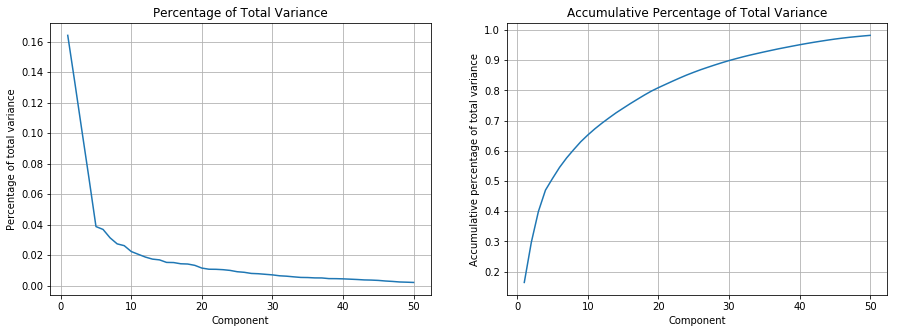

In [4]:
def P1():
### STUDENT START ###
    # Fit a PCA for the train data
    pca = PCA()   
    pca.fit(train_data)
    
    # Creation of a table with the results (percentage of the variance that is explained by the component
    # and accumulative percentage of the variance explaned by the components and all the previous ones)
    print('Component\tFraction of total variace\tAccumulative fraction of total variance')
    accululative_fraction_of_total_variance = 0 # Accumulate the total variance for each PCA
    
    # Displays the data of the table
    for i in range(50):
        fraction_of_variance = pca.explained_variance_ratio_[i] # Percentage of the variance explained by the component
        accululative_fraction_of_total_variance += fraction_of_variance
        
        print('%i\t\t%f\t\t\t%f' % (i + 1, fraction_of_variance, accululative_fraction_of_total_variance))  
    
    # Create two plots side-by-side. 
    plt.rcParams['figure.figsize'] = [15, 5]

    # Displays a plot with the percentage of the variance explained by each component
    plt.subplot(121)   
    plt.plot(range(1, 51), pca.explained_variance_ratio_[0:50])
    plt.xlabel('Component')
    plt.ylabel('Percentage of total variance')
    plt.title('Percentage of Total Variance')
    plt.grid(True)
    
    # Displays a plot with the accumulative percentage of the variance explained by the components
    plt.subplot(122)
    plt.plot(range(1, 51), np.cumsum(pca.explained_variance_ratio_[0:50]))
    plt.xlabel('Component')
    plt.ylabel('Accumulative percentage of total variance')
    plt.title('Accumulative Percentage of Total Variance')
    plt.grid(True)
### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

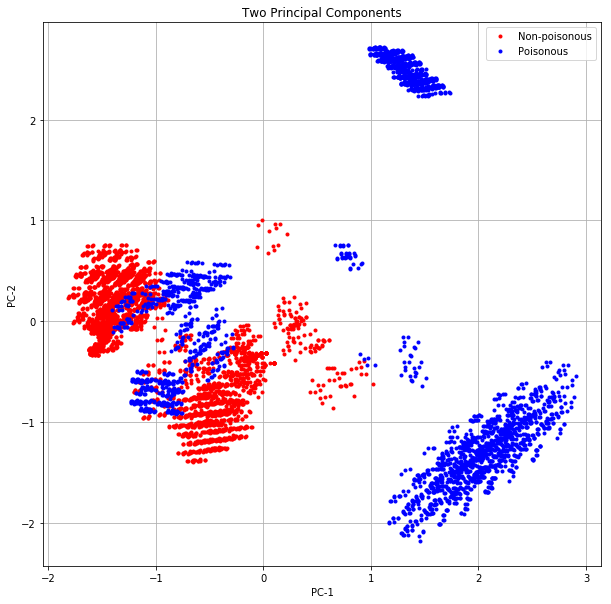

In [5]:
def P2():
### STUDENT START ###
    # Create and fit the PCA
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(train_data)
    
    # Set the plot parameters
    plt.rcParams['figure.figsize'] = [10, 10]
        
    # Plot the first two PCA's
    
    # Plot the negative cases (label = 0) in red
    plt.plot(x_pca[train_labels == 0, 0], x_pca[train_labels == 0, 1], '.', color='red', label='Non-poisonous')
    
    # Plot the positive cases (label = 1) in blue
    plt.plot(x_pca[train_labels == 1, 0], x_pca[train_labels == 1, 1], '.', color='blue', label='Poisonous') 
    
    # Plot settings
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    plt.legend()
    plt.title('Two Principal Components')
    plt.grid(True)
### STUDENT END ###

P2()

In [6]:
def distance_squared(p1, p2):
    ''' Return the squared distance between two points '''
    return np.sum((p1 - p2) ** 2)

def find_maximum_distance(points, centroid):
    ''' Find the maximum distance between the centroid and an array of points '''
    
    # First assume that the maximum distance is the distance to the first point
    maximum_distance_squared = distance_squared(points[0], centroid)
    
    # Loop over the other points and update the maximim distance if necessary
    for i in range(1, len(points)):
        current_distance_squared = distance_squared(points[i], centroid)
        
        if current_distance_squared > maximum_distance_squared:
            maximum_distance_squared = current_distance_squared
            
    return np.sqrt(maximum_distance_squared)

# List of colors used for the plots
colors = [ 'green', 'chocolate', 'khaki', 
          'red', 'brown', 'coral', 
          'lavender', 'lightblue', 'aqua', 
          'darkgreen', 'gold', 'fuchsia',
          'lime', 'lightgreen', 'grey',
          'olive' ]

def plot_clusters(n_clusters):
    '''
    This function uses K-Means plots groups of points to group the data into n_clusters. The data
    is ploted using the first two PCA's. The function also plots a circle with the center on the 
    centroid of the cluster and radius equal to the distance between the centroid and the most
    distant point.
    '''
    
    # Create the PCA (used for plotting)
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(train_data)
    
    # Crete the classified for n_clusters. The classifier will classify the data
    # over the 2D projected data
    classifier = KMeans(n_clusters=n_clusters)
    classifier.fit(x_pca)

    for i in range(n_clusters):
        # Select the points for each cluster and plots them
        cluster_points = x_pca[classifier.labels_ == i]
        plt.plot(cluster_points[:, 0], cluster_points[:, 1], '.', color=colors[i], label='Component %d' % (i + 1))

        # Plots the centeer of the cluster in black using a '+'
        center = classifier.cluster_centers_[i]    
        plt.plot(center[0], center[1], '+', color='black')
        
        # Plot a circle from the centroid to the most distant point
        radius = find_maximum_distance(cluster_points, center)
        circle = plt.Circle((center[0], center[1]), radius, facecolor='white', edgecolor=colors[i], alpha=.5)
        plt.gca().add_patch(circle)

    # Plot parameters
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    plt.legend()
    plt.grid(True)
    plt.title('%d Clusters' % n_clusters)

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

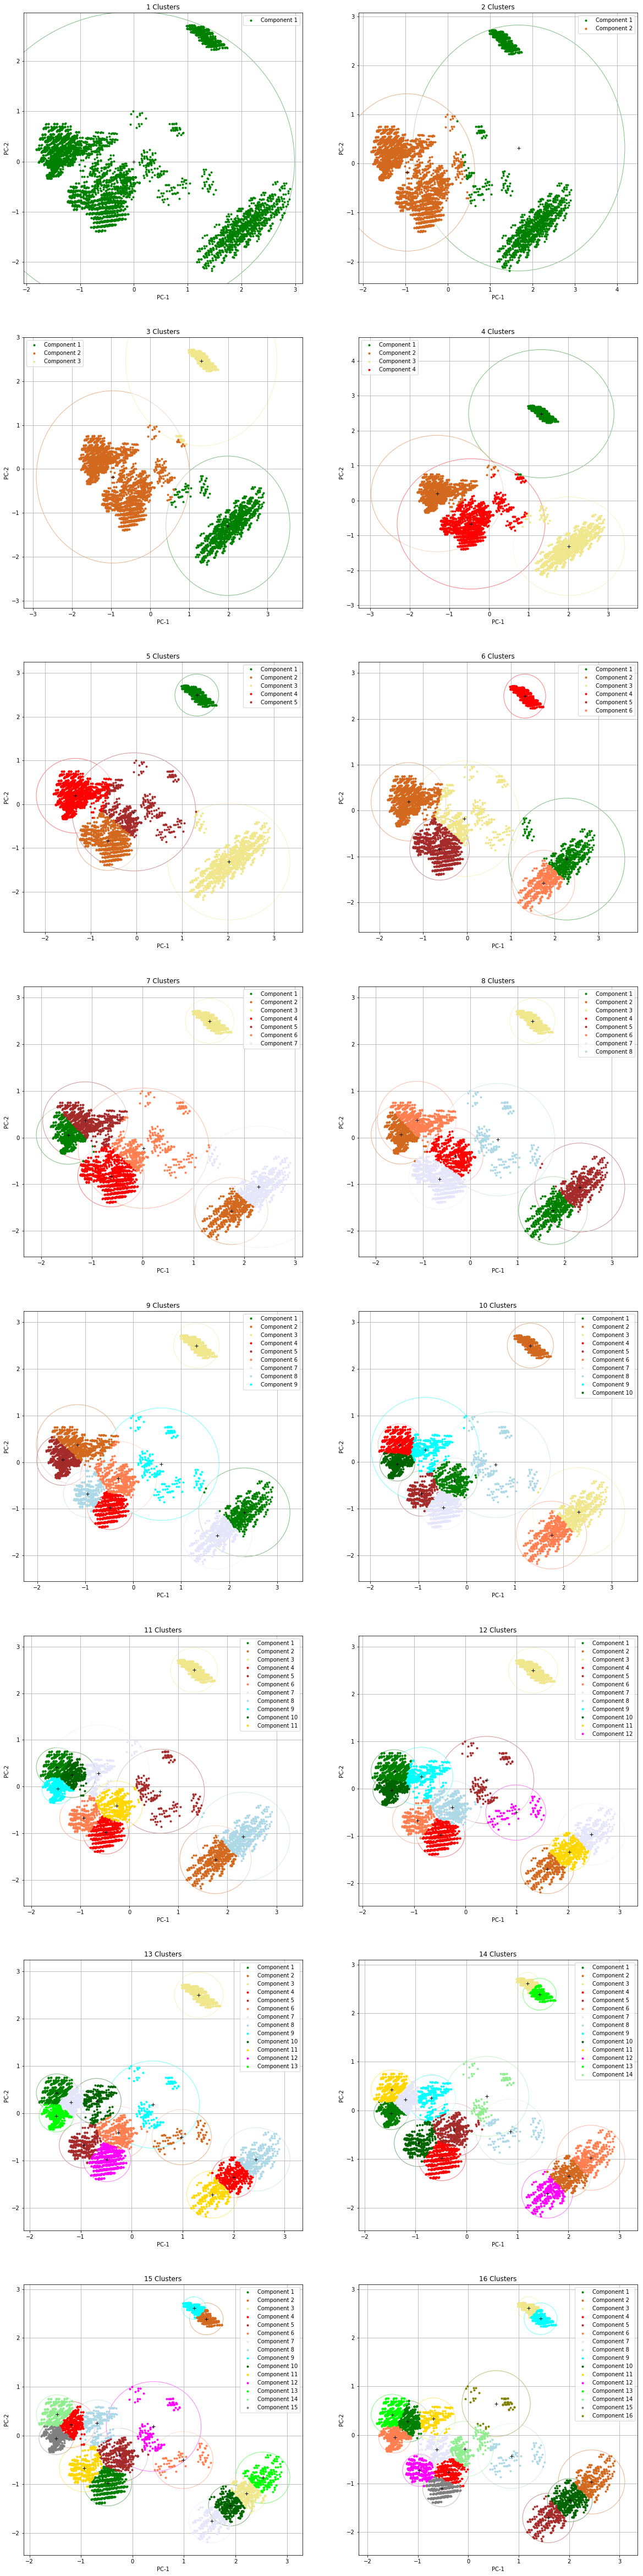

In [7]:
def P3():
### STUDENT START ###
    plt.rcParams['figure.figsize'] = [20, 85] # Set the figure size

    # Creates a 2 by 8 plots for 1 to 16 clusters
    for i in range(1, 17):
        plt.subplot(8, 2, i)        
        plot_clusters(i)
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

In [8]:
def plot_countours(x_pca, num_components, covariance_type):
    # fit a Gaussian Mixture Model with two components
    classifier = GaussianMixture(n_components=num_components, covariance_type=covariance_type)
    classifier.fit(x_pca)

    # display predicted scores by the model as a contour plot
    x = np.linspace(np.floor(np.min(x_pca[:, 0])), np.ceil(np.max(x_pca[:, 0])))
    y = np.linspace(np.floor(np.min(x_pca[:, 1])), np.ceil(np.max(x_pca[:, 1])))
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    z = -classifier.score_samples(XX)
    z = z.reshape(X.shape)
    
    # Plot the contours
    CS = plt.contour(X, Y, z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 2, 20), cmap='hsv')
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # Calculate the predicted class for each point
    predictions = classifier.predict(x_pca)
    
    for i in range(num_components):
        # Displays the points. The colors are the classes for each point
        plt.scatter(x_pca[predictions == i,0], x_pca[predictions == i,1], alpha=.1, color=colors[i])
    
    # Plot settings
    plt.title('Negative log-likelihood predicted by a GMM - covariance type %s for %d components' % (covariance_type, num_components))
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    plt.axis('tight')

/Users/marceloblinder/anaconda3/envs/MIDS/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


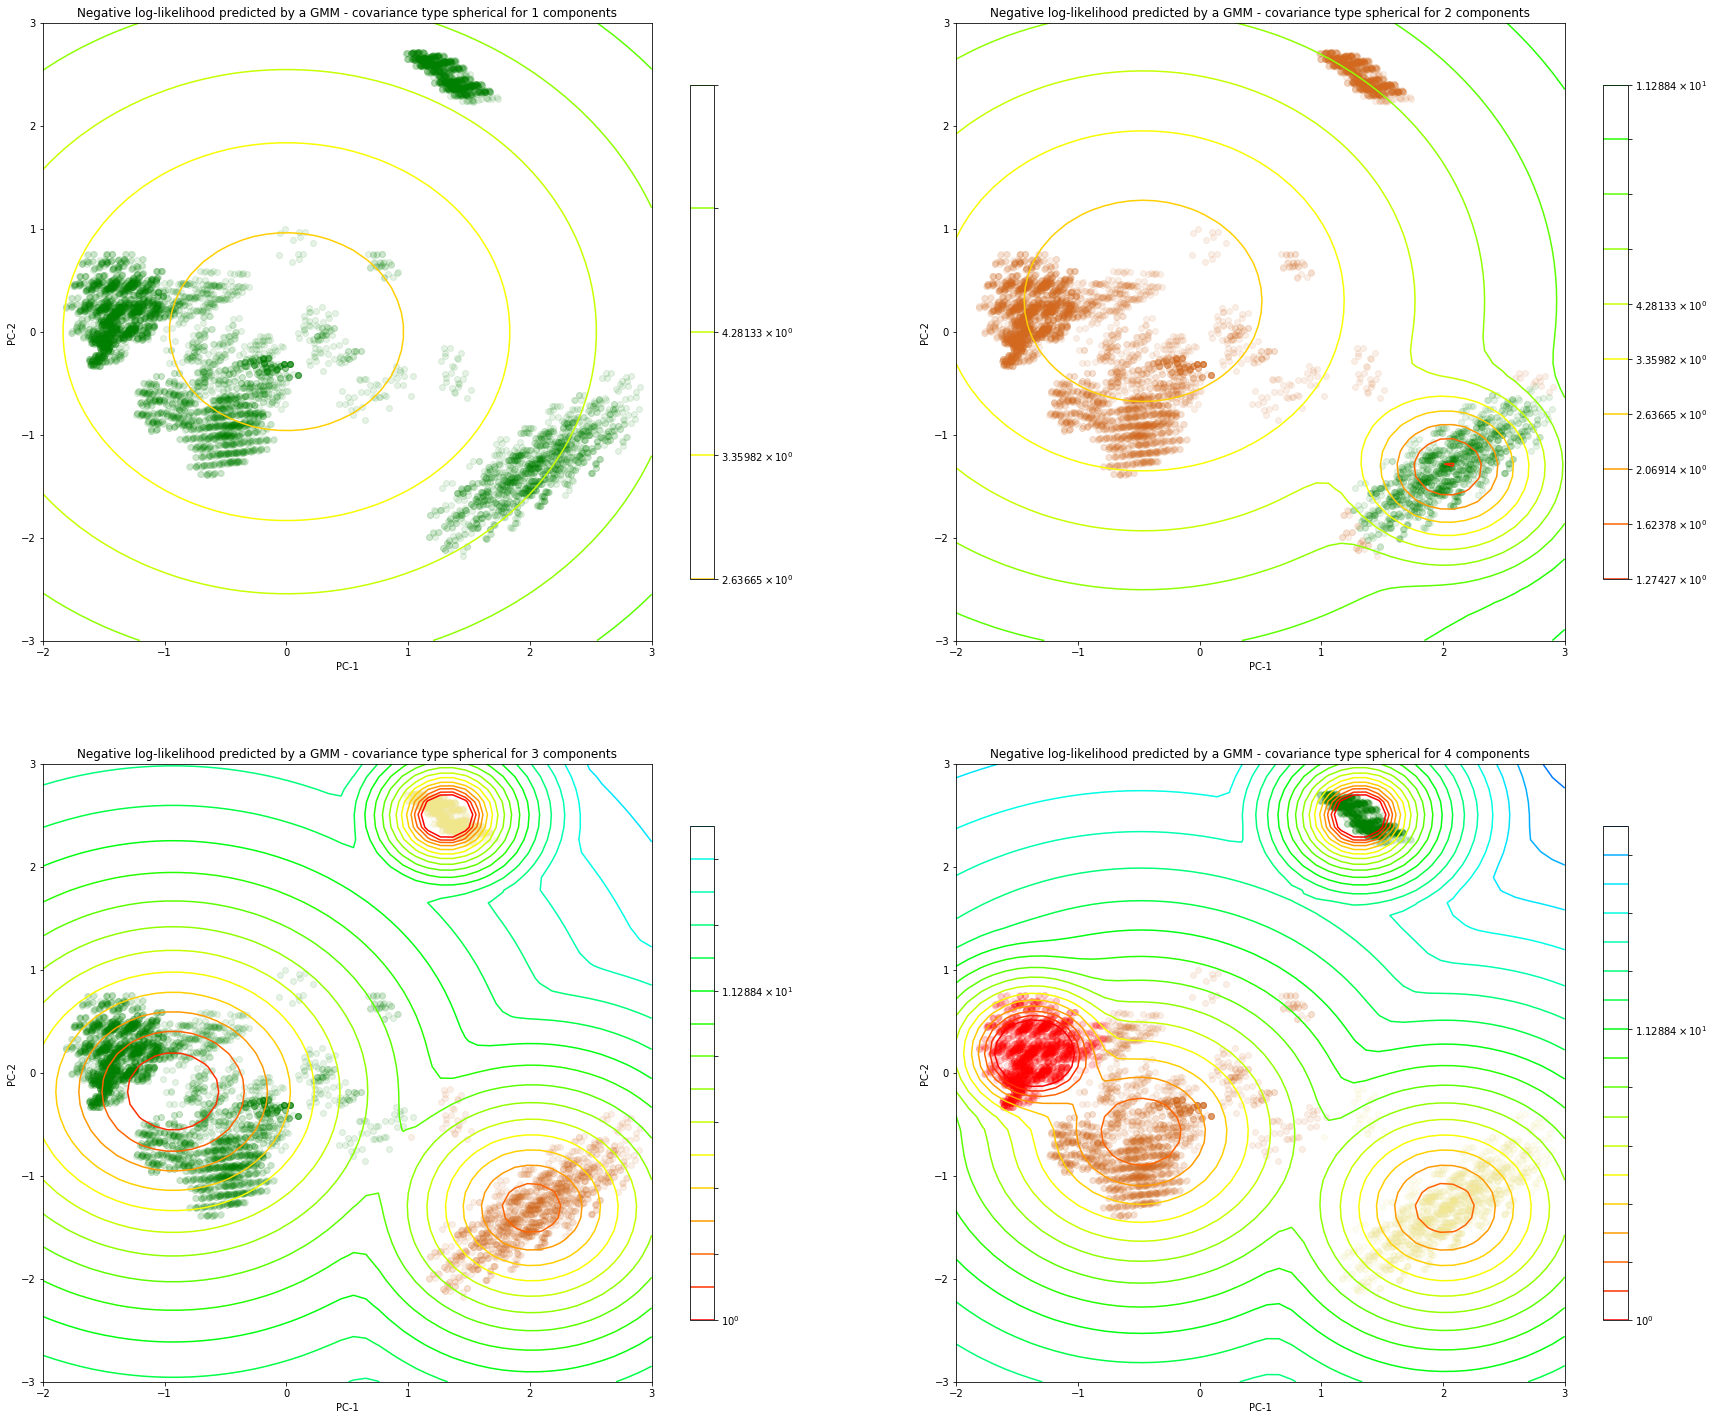

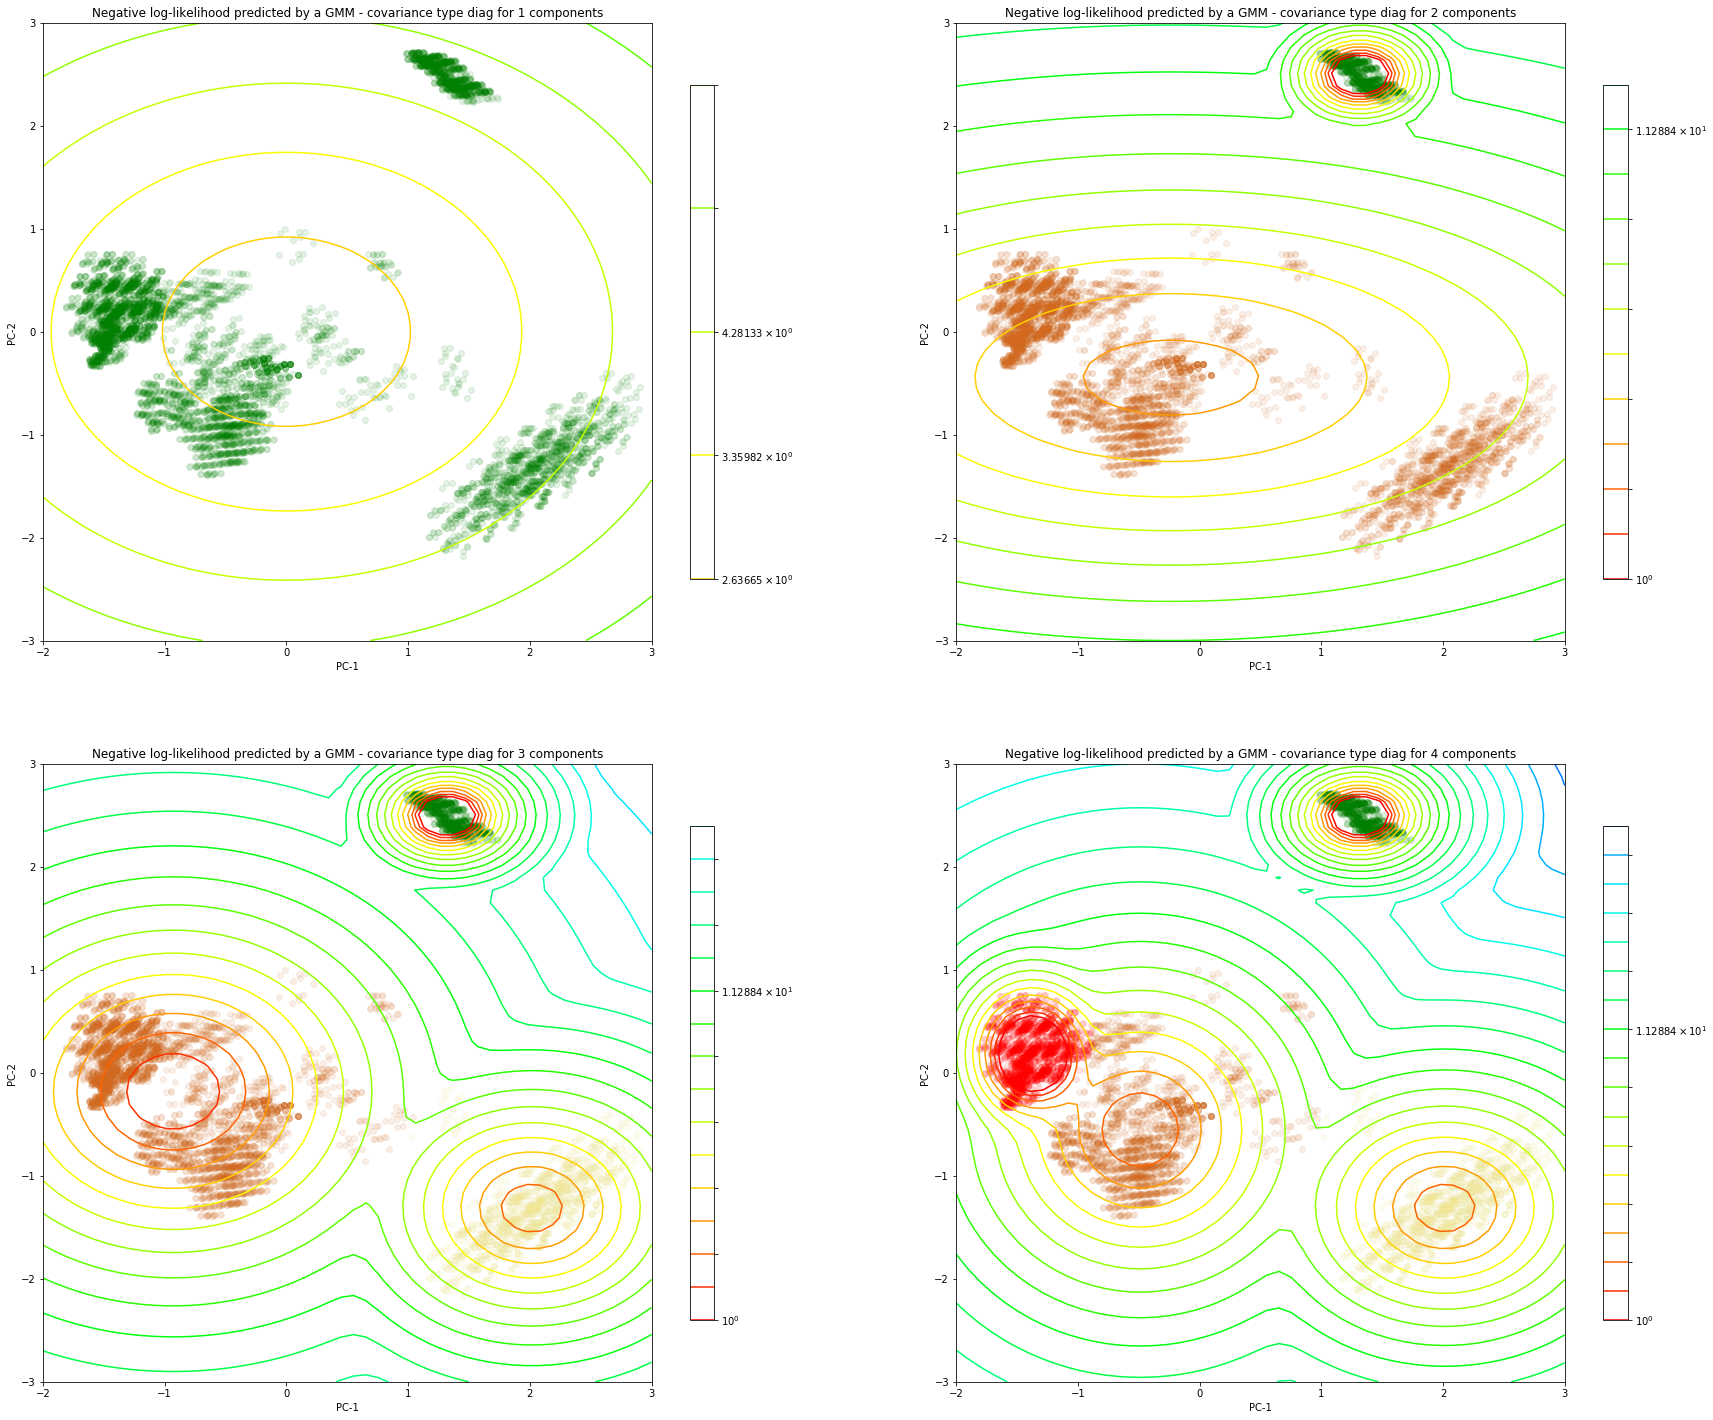

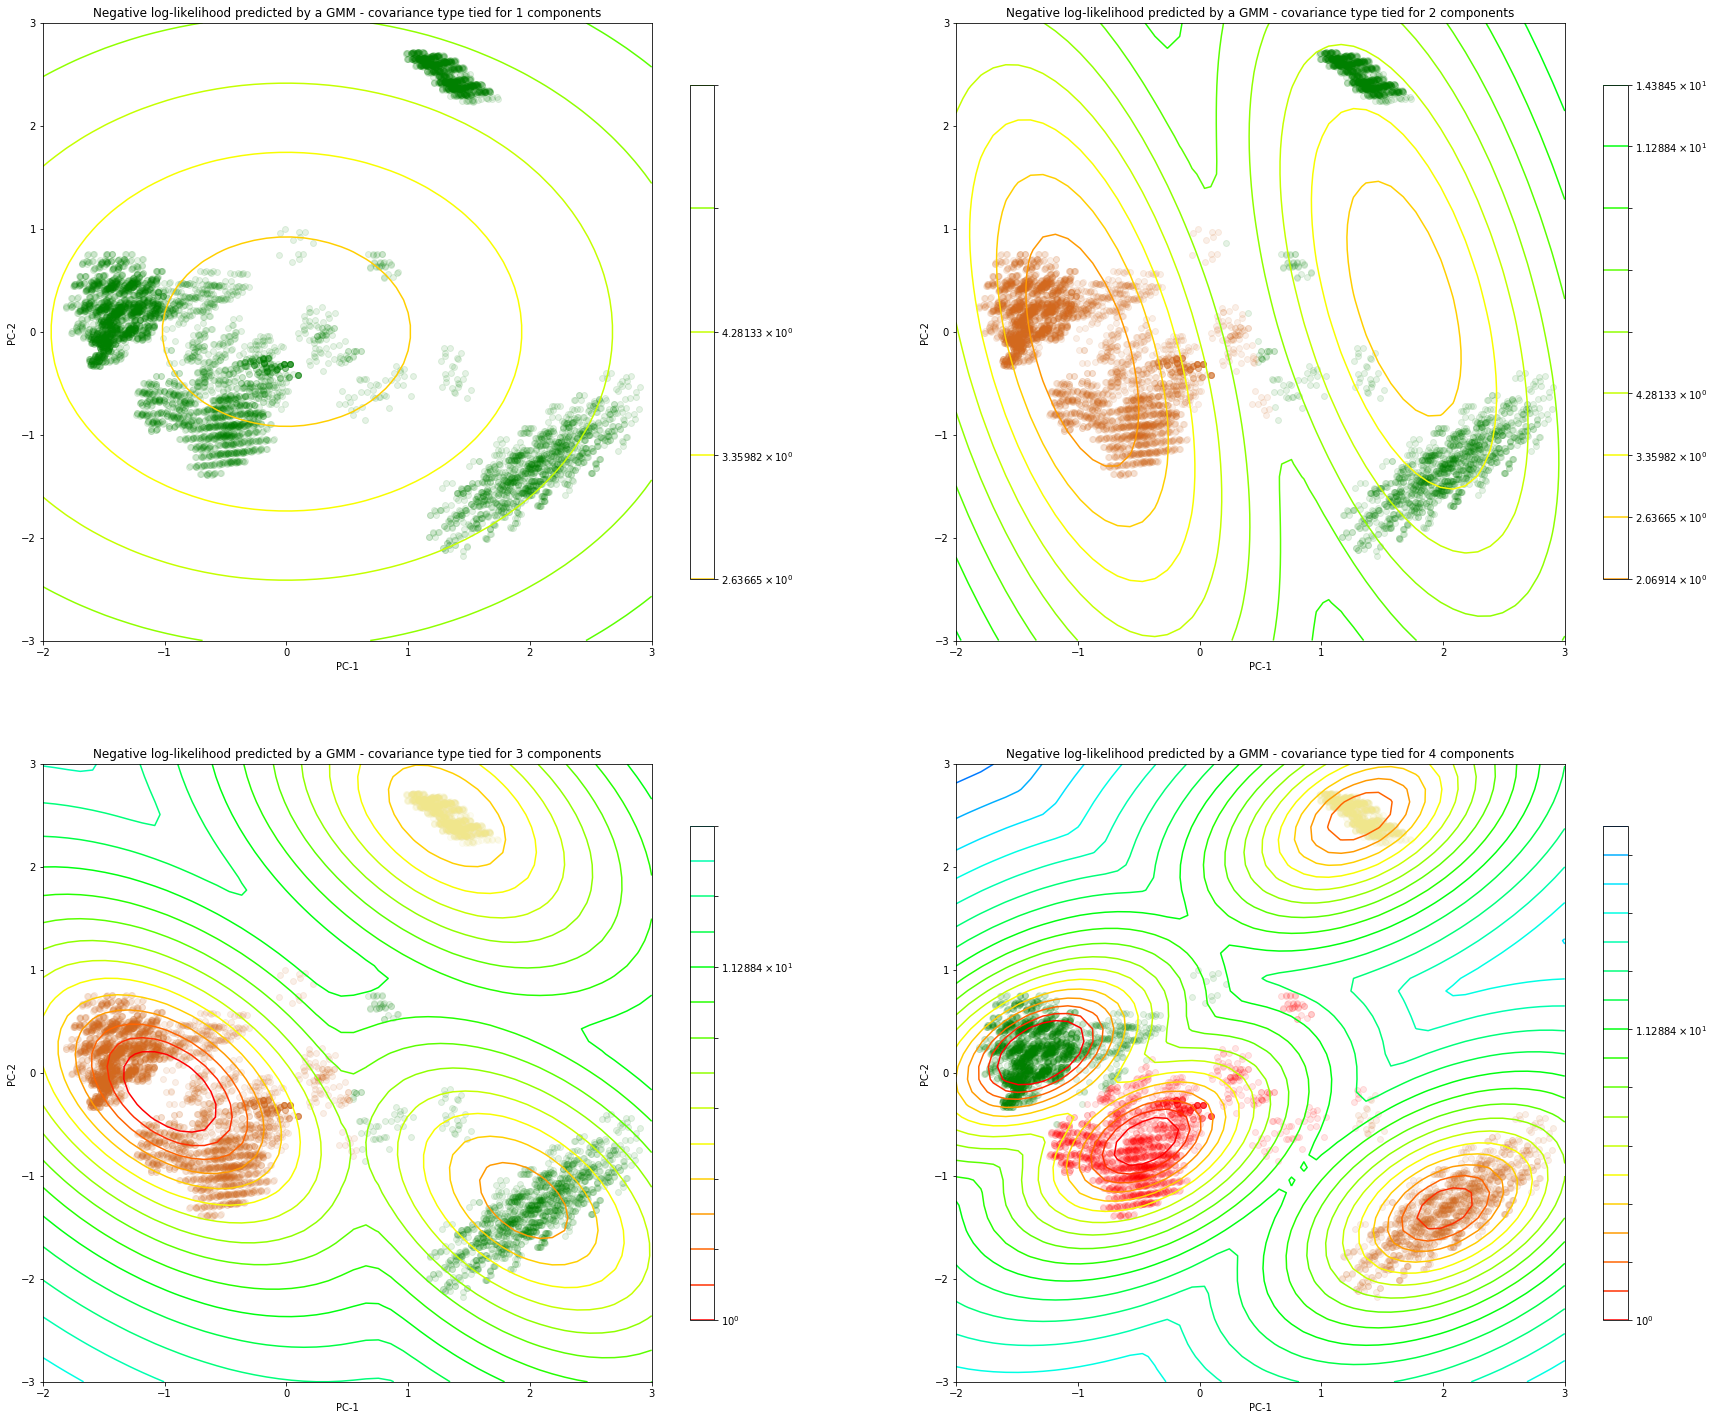

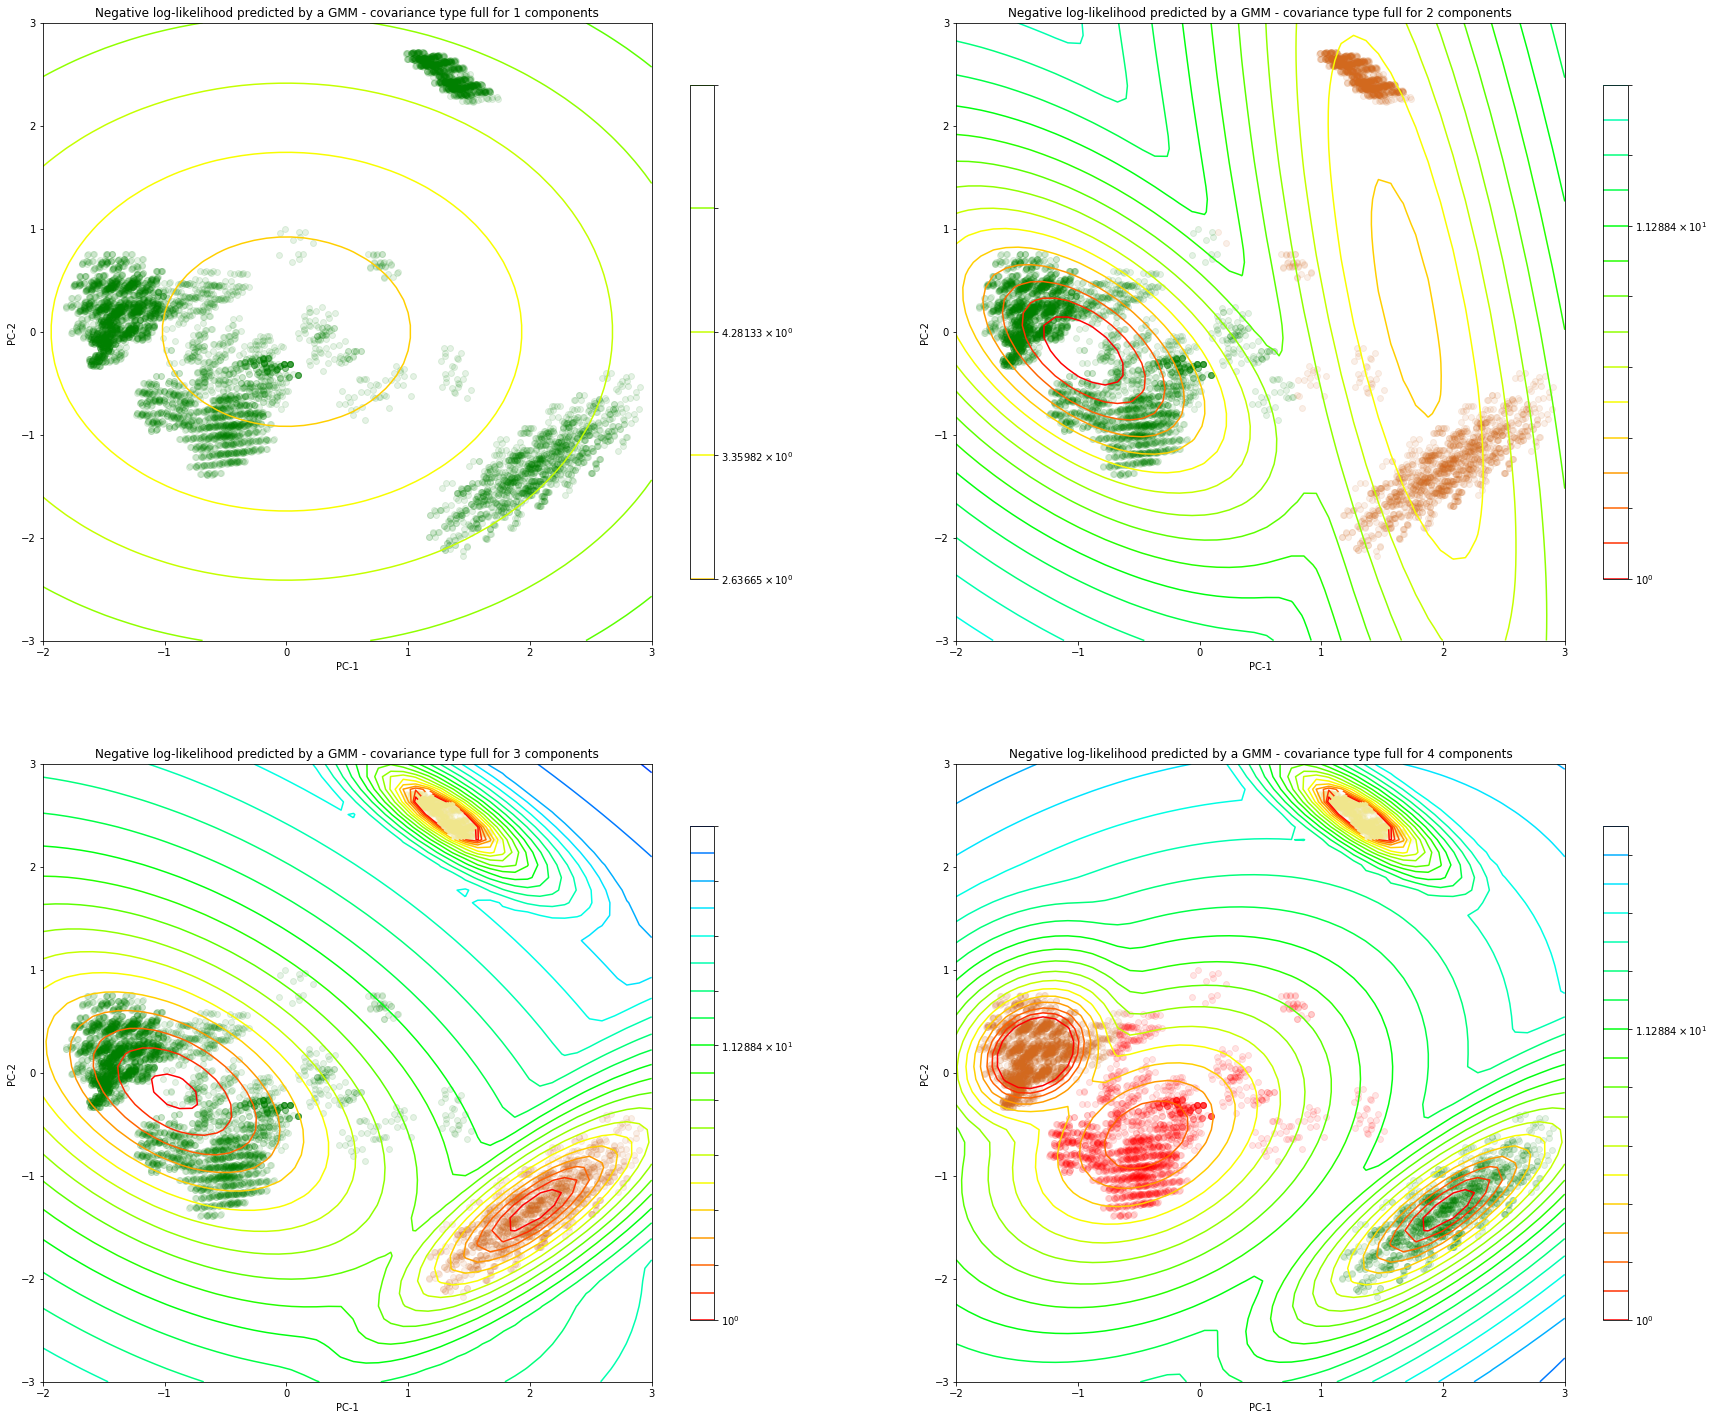

In [9]:
def P4():
### STUDENT START ###
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(train_data)

    for matrix_type in ['spherical', 'diag', 'tied', 'full']:
        index = 1
        plt.rcParams['figure.figsize'] = [30, 25]

        for i in range(1, 5):
            plt.subplot(2, 2, index)        
            plot_countours(x_pca, i, matrix_type)
            index += 1

        plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [10]:
def calculate_accuracy(num_pca, num_components, covariance_type):
    '''
    Calculate the accuracy of the prediction on the test set for a given number of
    PCA dimensions (num_pca), for a given number of components (num_components) and
    for a given covariance matrix type (covariance_type)
    '''
    
    # Project the data
    pca = PCA(n_components=num_pca)
    x_pca_train = pca.fit_transform(train_data)

    # Create a classifier for the non-poisonous samples of the training data
    classifier_non_poisonous = GaussianMixture(n_components=num_components, covariance_type=covariance_type)
    classifier_non_poisonous.fit(x_pca_train[train_labels == 0])

    # Create a classifier for the poisonous samples of the training data
    classifier_poisonous = GaussianMixture(n_components=num_components, covariance_type=covariance_type)
    classifier_poisonous.fit(x_pca_train[train_labels == 1])

    # Project the test data and calculate the score_samples
    x_pca_test = pca.transform(test_data) 
    score_non_poisonous = classifier_non_poisonous.score_samples(x_pca_test)
    score_poisonous = classifier_poisonous.score_samples(x_pca_test)

    # If score_poisonous is smaller than score_non_poisonous the prediction will be
    # poisonous (1 or true) and non-poisonous (0 or false) otherwise
    predictions = np.array(score_non_poisonous < score_poisonous).astype(int)
    
    return metrics.accuracy_score(test_labels, predictions)

In [11]:
def P5():
### STUDENT START ###
    accuracy = calculate_accuracy(2, 4, 'full')
    
    print('Accuracy for the model %f' % accuracy)
### STUDENT END ###

P5()

Accuracy for the model 0.950178


In [12]:
def num_parameters_covariance_matrix_full(num_pca):
    ''' Return the number of parameters for a full matrix with dimension  num_pca '''
    
    if num_pca == 1:
        return 1
    
    return num_pca + num_parameters_covariance_matrix_full(num_pca - 1)

def number_of_parameters_full(num_pca, num_components):
    ''' Return the number of parameters for a full matrix '''
    
    return 2 * num_components * (num_pca * num_parameters_covariance_matrix_full(num_pca))

def number_of_parameters_diag(num_pca, num_components):
    ''' Return the number of parameters for a diagonal matrix '''
    
    return 2 * num_components * (num_pca + num_pca)

def number_of_parameters_tied(num_pca, num_components):
    ''' Return the number of parameters for a tied matrix '''
    
    return 2 * (num_pca * num_components + num_parameters_covariance_matrix_full(num_pca))

def number_of_parameters_spherical(num_pca, num_components):
    ''' Return the number of parameters for a spherical metrix '''
    
    return 2 * (num_pca * num_components + num_components)

def number_of_parameters(num_pca, num_components, covariance_type):
    ''' 
    Calculate the number of parameters that need to be calculated given the number of PCA dimensions,
    the number of components and the type of matrix
    '''
    
    if covariance_type == 'full':
        return number_of_parameters_full(num_pca, num_components)
    elif covariance_type == 'diag':
        return number_of_parameters_diag(num_pca, num_components)
    elif covariance_type == 'tied':
        return number_of_parameters_tied(num_pca, num_components)
    elif covariance_type == 'spherical':
        return number_of_parameters_spherical(num_pca, num_components)


def print_accuracies(covariance_type):
    '''
    For a given covariance matrix type, calculate the accuracy of the predictions for all combinations
    of comninations of the number of dimensions of the PCA and components, as long as the total number of 
    parameters equal or less than 50
    '''
    
    print()
    print('%s Matrix' % (covariance_type[0].upper() + covariance_type[1:]))
    print('Number of PCA\tNumber of Components\tNumber of Parameters\tAccuracy')

    for num_pca in range(1, 10):
        for num_components in range(1, 10):
            num_parameters = number_of_parameters(num_pca, num_components, covariance_type)

            if num_parameters <= 50:
                print("%i\t\t%i\t\t\t%i\t\t\t%f" % (num_pca, num_components, num_parameters, calculate_accuracy(num_pca, num_components, covariance_type)))

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [13]:
def P6():
### STUDENT START ###
    print_accuracies('diag')
    print_accuracies('tied')
    print_accuracies('spherical')
    print_accuracies('full')
### STUDENT END ###

P6()


Diag Matrix
Number of PCA	Number of Components	Number of Parameters	Accuracy
1		1			4			0.844306
1		2			8			0.898577
1		3			12			0.904804
1		4			16			0.912811
1		5			20			0.912811
1		6			24			0.910142
1		7			28			0.909253
1		8			32			0.909253
1		9			36			0.905694
2		1			8			0.862100
2		2			16			0.872776
2		3			24			0.947509
2		4			32			0.939502
2		5			40			0.945730
2		6			48			0.943950
3		1			12			0.869217
3		2			24			0.859431
3		3			36			0.913701
3		4			48			0.951957
4		1			16			0.843416
4		2			32			0.813167
4		3			48			0.911032
5		1			20			0.878114
5		2			40			0.920819
6		1			24			0.885231
6		2			48			0.926157
7		1			28			0.911032
8		1			32			0.912811
9		1			36			0.903025

Tied Matrix
Number of PCA	Number of Components	Number of Parameters	Accuracy
1		1			4			0.844306
1		2			6			0.883452
1		3			8			0.915480
1		4			10			0.918149
1		5			12			0.912811
1		6			14			0.912811
1		7			16			0.909253
1		8			18			0.912811
1		9			20			0.911922
2		1			10			0.862100
2		2			14			0.889680
2		3			18	